# 1. Load & Inspect

- Load the CSV file into pandas.

- Display first 10 rows.

- Show shape, dtypes, and missing values.

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [45]:
df = pd.read_csv('sales_data.csv')
print(df.head(10))

         date store    product  units_sold  price   category
0  2024-01-01     A       Cola          23   1.62  Beverages
1  2024-01-01     A      Chips          15   4.46     Snacks
2  2024-01-01     A  Chocolate          21   1.08     Snacks
3  2024-01-01     A      Water          16   1.73  Beverages
4  2024-01-01     A      Juice          17   2.73  Beverages
5  2024-01-01     A    Cookies          17   1.56     Snacks
6  2024-01-01     B       Cola          17   2.82  Beverages
7  2024-01-01     B      Chips          24   3.06     Snacks
8  2024-01-01     B  Chocolate          21   3.43     Snacks
9  2024-01-01     B      Water          15   4.80  Beverages


In [46]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

0      2024-01-01
1      2024-01-01
2      2024-01-01
3      2024-01-01
4      2024-01-01
          ...    
1633   2024-03-31
1634   2024-03-31
1635   2024-03-31
1636   2024-03-31
1637   2024-03-31
Name: date, Length: 1638, dtype: datetime64[ns]


In [47]:
df.shape

(1638, 6)

In [48]:
df.isnull().sum()


date          0
store         0
product       0
units_sold    0
price         0
category      0
dtype: int64

# 2. Clean & Transform

- Convert date column to datetime.

- Add a revenue column: units_sold * price.

- Replace units_sold <= 0 with NaN.

- Fill missing prices with mean price.

- Add day of week column.

In [49]:
df["date"] = pd.to_datetime(df["date"])
print(df["date"])


0      2024-01-01
1      2024-01-01
2      2024-01-01
3      2024-01-01
4      2024-01-01
          ...    
1633   2024-03-31
1634   2024-03-31
1635   2024-03-31
1636   2024-03-31
1637   2024-03-31
Name: date, Length: 1638, dtype: datetime64[ns]


In [ ]:
df['total'] = df['units_sold'] * df['price']
print(df['total'])

0       37.26
1       66.90
2       22.68
3       27.68
4       46.41
        ...  
1633    60.97
1634    90.50
1635    74.60
1636    25.52
1637    62.32
Name: total, Length: 1638, dtype: float64


In [51]:
df.loc[df['units_sold'] <= 0, 'units_sold'] = np.nan

In [52]:
df["price"] = df["price"].fillna(df["price"].mean())
# print(df["price"])

In [53]:
df["day_of_week"] = df["date"].dt.day_name()
print(df["day_of_week"])

0       Monday
1       Monday
2       Monday
3       Monday
4       Monday
         ...  
1633    Sunday
1634    Sunday
1635    Sunday
1636    Sunday
1637    Sunday
Name: day_of_week, Length: 1638, dtype: object


# 3. Exploratory Analysis

- Total revenue per store.

- Average units sold per category.

- Compute z-score of units_sold using NumPy.

- Top 5 product×store revenue combos

In [54]:
revenue_per_store = df.groupby('store')['total'].sum()
print(revenue_per_store)

store
A    31839.26
B    32333.41
C    31411.57
Name: total, dtype: float64


In [55]:
df.groupby('category')['units_sold'].mean()

category
Beverages    19.971917
Snacks       20.010989
Name: units_sold, dtype: float64

In [56]:
mean_units = np.mean(df['units_sold'])
std_units = np.std(df['units_sold'])

df['units_sold_zscore'] = (df['units_sold'] - mean_units) / std_units

print(mean_units)

print(std_units)

print(df['units_sold_zscore'])

19.99145299145299
4.51303094562471
0       0.666636
1      -1.106009
2       0.223474
3      -0.884428
4      -0.662848
          ...   
1633   -1.549170
1634    1.109797
1635    0.001894
1636    0.445055
1637   -0.219687
Name: units_sold_zscore, Length: 1638, dtype: float64


In [57]:
# compute total revenue per month and find the month with the highest revenue
monthly_totals = df.set_index('date').resample('M')['total'].sum()
totals = monthly_totals.values
best_month = monthly_totals.idxmax()  # Timestamp of the month end with highest revenue

print("Best month (month end):", best_month)
print("Monthly totals:")
print(monthly_totals)


Best month (month end): 2024-01-31 00:00:00
Monthly totals:
date
2024-01-31    32560.64
2024-02-29    31099.69
2024-03-31    31923.91
Freq: ME, Name: total, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8912\2768850049.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = df.set_index('date').resample('M')['total'].sum()


# 4. Visualization Tasks
A. Basic

- Daily revenue line plot.

- Monthly revenue per store bar plot.

- Avg price per category bar plot.

B. Intermediate

- Scatter: price vs units_sold (color by category).

- Boxplot of revenue per store.

- Heatmap of revenue pivot (store x category).

C. Advanced

- Regression line: price vs units_sold.

- A subplot figure showing:

* daily revenue

* daily units sold

* price histogram


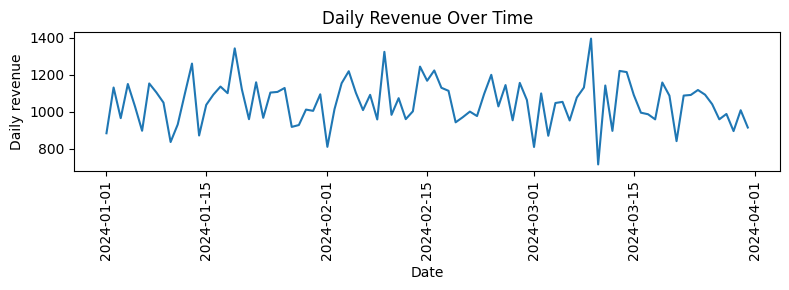

In [58]:
# aggregate daily revenue and plot it
daily_revenue = df.groupby('date', as_index=False)['total'].sum()

plt.figure(figsize=(8,3))
sns.lineplot(data=daily_revenue, x='date', y='total')
plt.xlabel('Date')
plt.ylabel('Daily revenue')
plt.title('Daily Revenue Over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8912\2032492432.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby([pd.Grouper(key='date', freq='M'), 'store'])['total'].sum().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8912\2032492432.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_monthly_revenue, x='store', y='total', ci=None)


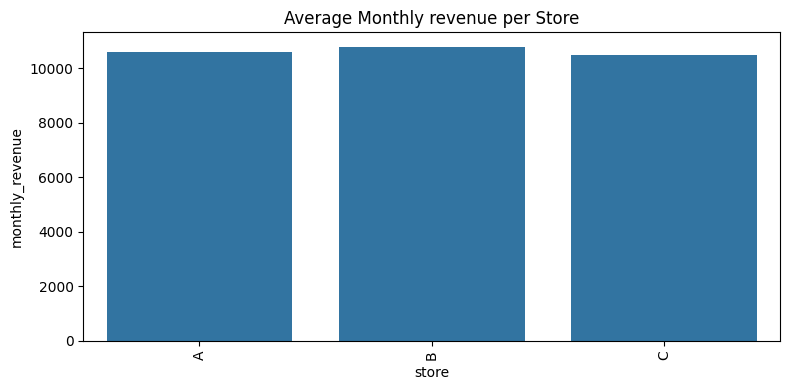

In [59]:
# compute monthly revenue per store and then average across months
monthly_revenue = df.groupby([pd.Grouper(key='date', freq='M'), 'store'])['total'].sum().reset_index()
avg_monthly_revenue = monthly_revenue.groupby('store')['total'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=avg_monthly_revenue, x='store', y='total', ci=None)
plt.title('Average Monthly revenue per Store')
plt.xlabel('store')
plt.ylabel('monthly_revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8912\140250934.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_price, x='category', y='price', ci=None)


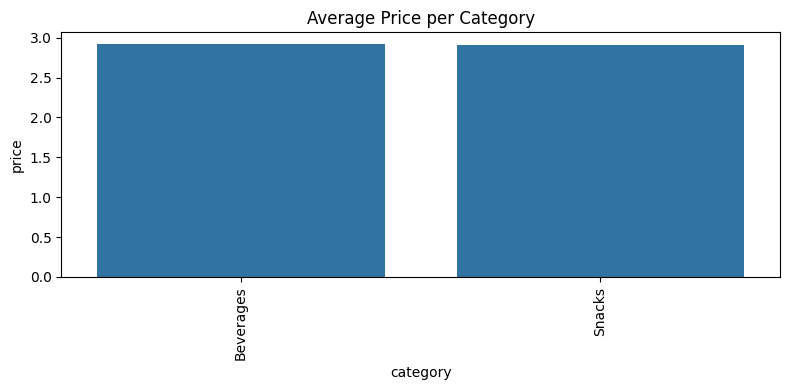

In [60]:
# compute average unit price per category using the original dataframe (df has the 'price' column)
avg_price = df.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=avg_price, x='category', y='price', ci=None)
plt.title('Average Price per Category')
plt.xlabel('category')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

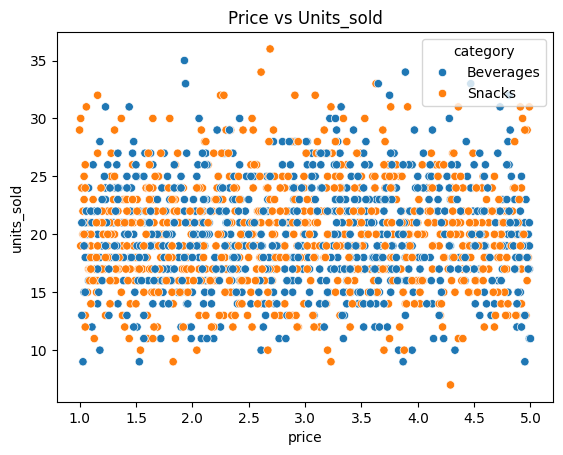

In [62]:
plt.Figure(figsize=(8,6))
sns.scatterplot(data=df, x = 'price', y = 'units_sold', hue = 'category')
plt.title("Price vs Units_sold")
plt.xlabel('price')
plt.ylabel('units_sold')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8912\3853608995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='store', y='total', palette="Set2")


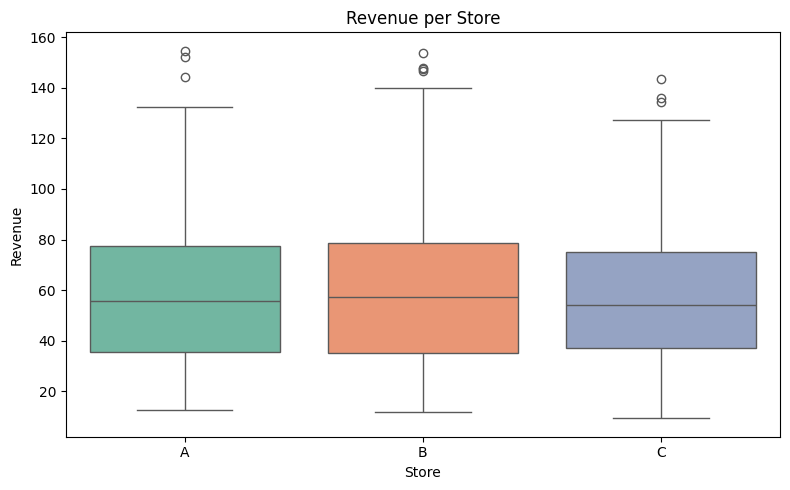

In [70]:
# Boxplot: revenue per store
plt.figure(figsize=(8,5))
# use the 'total' column (revenue) that exists in df
sns.boxplot(data=df, x='store', y='total', palette="Set2")
plt.title('Revenue per Store')
plt.xlabel('Store')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

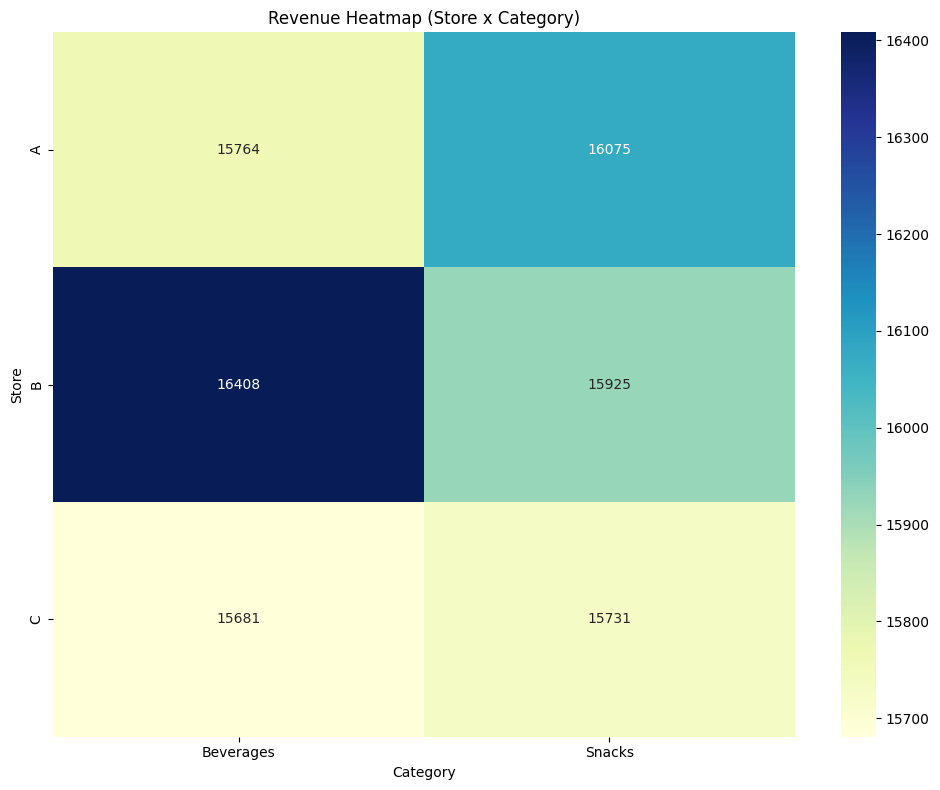

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.pivot_table(values='total', index='store', columns='category', aggfunc='sum'), annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Category')
plt.ylabel('Store')
plt.title('Revenue Heatmap (Store x Category)')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

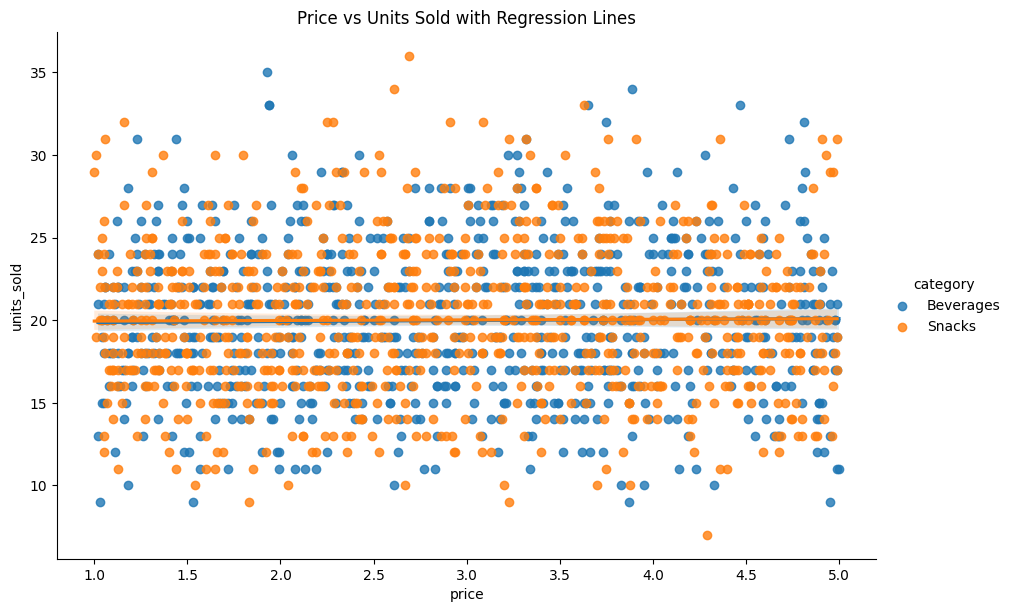

In [73]:
plt.figure(figsize=(10,6))
regression_plot = sns.lmplot(data=df, x='price', y='units_sold', hue='category', height=6, aspect=1.5)
plt.title('Price vs Units Sold with Regression Lines')
plt.xlabel('price')
plt.ylabel('units_sold')
plt.show()

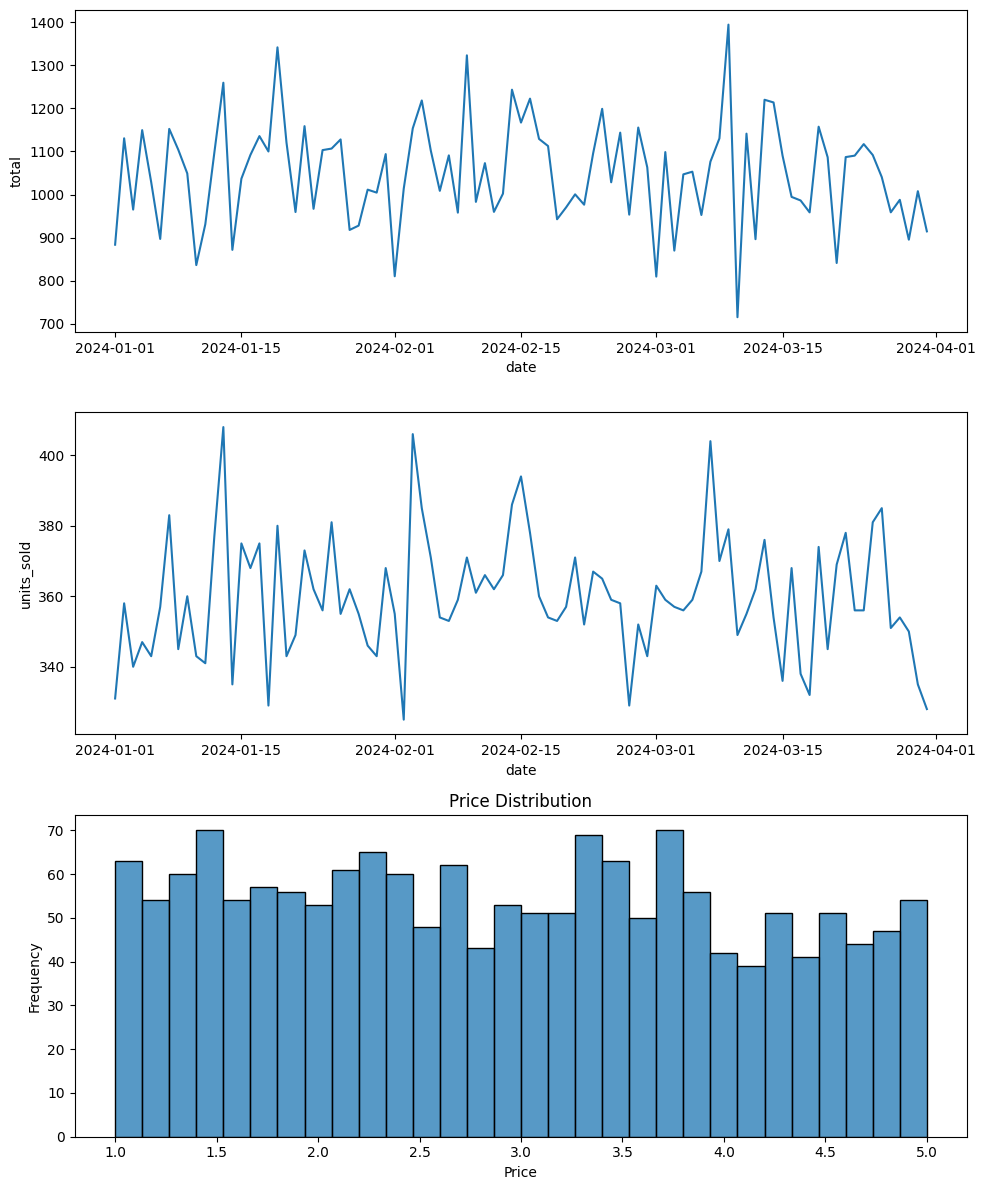

In [74]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
# Daily revenue line plot
sns.lineplot(data=daily_revenue, x='date', y='total', ax=axes[0])
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.title('Daily Revenue Over Time')
# Daily units sold line plot
sns.lineplot(data=df.groupby('date', as_index=False)['units_sold'].sum(), x='date', y='units_sold', ax=axes[1])
plt.xlabel('Date')
plt.ylabel('Daily Units Sold')
plt.title('Daily Units Sold Over Time')
# Price histogram
sns.histplot(data=df, x='price', bins=30, ax=axes[2])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.tight_layout()
plt.show()